# Proyecto - Deteccion de Fraude
Tenemos un dataset que registra todas compras/transacciones con tarjeta de credito. Nuestro objetivo es determinar cuando una transaccion es fraudulenta o no, segun nuestro modelo predictivo y ver que tan preciso es tal resultado.

## Este Proyecto Constará de 4 pasos:
1. analisis exploratorio de nuestros datos
2. Limpieza y preparacion del dataframe
3. Creacion de modelo de Machine Learning
4. Evaluacion

### 1. Analisis Exploratorio: Haremos una exploracion para encontrar correlaciones/comportamientos en nuestro features como tambien irregularidades y anomalias que puedan subsanarse posteriormente.

In [1]:
# Importamos nuestras librerias para esta etapa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Traemos nuestro dataset y le damos un formato de dataframe con pandas

data = pd.read_csv(r'C:\Users\54266\Desktop\Henry\Proyectos\Hackathon\Fraude en TC\fraude_tc.csv')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [11]:
#Verificamos las dimensiones de nuestro dataframe
data.shape

(1000000, 8)

In [12]:
#Vemos como se distribuyen nuestros datos, en cuanto columnas y tipo de datos que albergan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


##### observamos que no hay valores nulos, por lo que es un buen indicio

In [13]:
# Chequeamos si hay valores duplicados
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [14]:
#Chequeamos la distribucion estadistica de nuestros datos
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Limpieza de Datos: haremos una optimizacion de nuestros dataframe de acuerdo a las anomalias encontradas en la primera etapa. El objetivo es obtener una adecuada normalizacion de los datos para que nuestro modelo pueda encontrar patrones lo mas optimo posible, sin toparse con valores nulos u outliers,por ejemplo.

In [8]:
# Como no se han detectado valores nulos, valores duplicados ni tampoco columnas con formato no numerico, se omiten tales pasos

### 3. Creacion del modelo: aqui comenzaremos con implementar los modelos de machines learning. La idea principal es usar algoritmos de clasificacion, como KNN, DecisionTree y otros mas.

#### K-Nearest Neighbors

In [15]:
# Primero dividimos nuestra data de entrenamiento con nuestra de data prueba,tambien importaremos el modulo train test split
from sklearn.model_selection import train_test_split

X = data.drop(['fraud'], axis= 1)

y = data['fraud']

X_train ,X_test , y_train , y_test = train_test_split(X,      #Nuestro conjunto de entrenamiento.
                                                     y,  #Nuestro Target.
                                                    test_size = 0.3,  #Porcion de datos de prueba %30.
                                                    random_state = 21, # Establece una semilla para un generador de numeros aleatorios que divide los datos.
                                                     stratify = y) #Para que nuestra division refleje la proporcion de etiquetas en nuestros datos.

In [16]:
# Importamos nuestro modelo de la libreria scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Creamos nuestro modelo

knn = KNeighborsClassifier(n_neighbors=4) # Probamos con 4
knn.fit(X_train, y_train) # Entrenamos el modelo
print(knn.score(X_test, y_test)) # Obtenemos nuestros resultados

0.9842233333333333


In [10]:
# Ahora entenderemos a profundidad como funciona el NÚmero de Nieghbors, y buscaremos el numero mas optimo para nuestro caso.
neighbors = np.arange(1, 8)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)  #vamos iterando y aumentando el numero de Neighbors;
    knn.fit(X_train, y_train)                         #  en cada iteracion entrenara el modelo y despues retornará el score
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[1 2 3 4 5 6 7] 
 {1: 1.0, 2: 0.9942885714285714, 3: 0.9932714285714286, 4: 0.9915228571428572, 5: 0.9904442857142857, 6: 0.9894514285714285, 7: 0.9885771428571428} 
 {1: 0.9854933333333333, 2: 0.9844866666666666, 3: 0.9841533333333333, 4: 0.9842233333333333, 5: 0.9831, 6: 0.9832433333333334, 7: 0.9823433333333333}


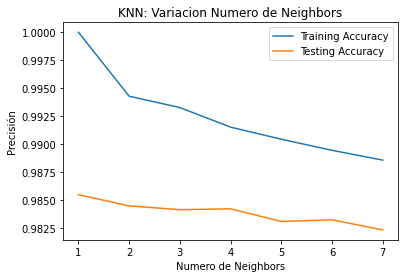

In [14]:
# Ploteamos nuestros resultados
# Add a title
plt.title("KNN: Variacion Numero de Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Numero de Neighbors")
plt.ylabel("Precisión")

# Display the plot
plt.show()


#### Podemos observar que a medida que k aumenta mas de 4, vemos un sobreajuste donde el rendimiento decrece significativamente. Concluimos que la precision maxima de nuestra prueba ocurre alrededor de 4 neighbors

### 4. Evaluaremos nuestras predicciones - Confusion Matrix

#### ¿Que es la matriz de confusion? Una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

para mas informacion visitar documentacion https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [18]:
# Importamos nuestras metricas de scikit-learn
from sklearn.metrics import confusion_matrix , classification_report
# Ya entrenado, predecimos nuestra data de prueba y posteriormente evaluaremos con la matriz
y_pred = knn.predict(X_test)

# Imprimimos nuestra matriz
conf = confusion_matrix(y_test, y_pred)
print(conf)



[[272044   1735]
 [  2998  23223]]


Resultados: 

    Verdaderos positivos, son las transacciones legitimas correctamente  como legitimas : 272044
    Verdaderos negativos, son las transacciones fraudulentas correctamente etiquedatas como fraudulentas : 23223
    Falsos positivos, son las transacciones legitimas incorrectamente etiquetadas : 2998            
    Falsos negativos, son las transacciones fraudulentas incorrectamente etiquetadas : 1735

In [22]:
# Siguiendo la formula de nuestro accuracy:
TP = conf[0,0] # Verdaderos positivos
TN = conf[1,1] # Verdaderos negativos
FP = conf[0,1] # Falsos positivos
FN = conf[1,0] # Falsos negativos

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.9842233333333333


In [ ]:
# Ademas de la matriz de confusion, tenemos otras metricas que nos pueden ayudar mejor a entender nuestro modelo
print(classification_report(y_test, y_pred))

Clasification report: 
Un informe de clasificación se utiliza para medir la calidad de las predicciones de un algoritmo de clasificación. Cuántas predicciones son Verdaderas y cuántas son Falsas. Más específicamente, los verdaderos positivos, los falsos positivos, los verdaderos negativos y los falsos negativos se utilizan para predecir las métricas de un informe de clasificación.

El informe muestra la precisión, el recall y la puntuación f1 de las principales métricas de clasificación por clase. Las métricas se calculan utilizando verdaderos y falsos positivos, verdaderos y falsos negativos. Positivo y negativo en este caso son nombres genéricos para las clases predichas.

Recall: es la capacidad de un clasificador para encontrar todas las instancias positivas. Para cada clase se define como la razón de verdaderos positivos a la suma de verdaderos positivos y falsos negativos.

F1 : La puntuación F1 es una media armónica ponderada de precisión y recuperación tal que la mejor puntuación es 1,0 y la peor es 0,0. En términos generales, los puntajes de F1 son más bajos que las medidas de precisión, ya que incorporan precisión y recuperación en su cálculo. Como regla general, se debe usar el promedio ponderado de F1 para comparar modelos de clasificador, no la precisión global.


para mas informacion https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
